<center>Bachelor of Ecole Polytechnique</center>
<center>Elouan Gros, Remy Seassau<center>

# MAA204 Homework: Video Games and Violence

In [97]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

In [4]:
# loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm

This project's objective is to explore the correlation between video games and violence in the real world. We have chosen two data sets that we will work with:
* A crime statistics dataset from the [FBI](https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/topic-pages/tables/table-1 "FBI Crime Statistics Dataset")
* A video game sales dataset from [kaggle](https://www.kaggle.com/upadorprofzs/eda-video-game-sales/data "Kaggle Video Game Sales Dataset")

In [5]:
# Importing data sets
crime = pd.read_csv("./datasets/crime.csv")
vidya = pd.read_csv("./datasets/vgsales.csv")

<div markdown=1 class="Ide">
Let us have a look at what our datasets are made of

In [6]:
crime.head()

,Year,population,Violent crime,Property crime,Murder and non-negligent man-slaughter,Forcible rape,Robbery,Aggravated assault,Burglary,Larceny-theft,Motor vehicle theft
0,1981,229465714,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800
1,1982,231664458,1322390,11652000,21010,78770,553130,669480,3447100,7142500,1062400
2,1983,233791994,1258087,10850543,19308,78918,506567,653294,3129851,6712759,1007933
3,1984,235824902,1273282,10608473,18692,84233,485008,685349,2984434,6591874,1032165
4,1985,237923795,1327767,11102590,18976,87671,497874,723246,3073348,6926380,1102862


In [61]:
vidya.sort_values(by=["Year"]).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15


As we can see, we have access to the total amount of crimes committed per year for multiple types of crime along with thetotal population of the United-States that year. Our video game sales data set is composed of individual games with their release date, genre publisher and the sales for different regions in millions.

<div markdown=1 class="Ide"> Before we go any further, lets take a look at our crime dataset to see how it generally behaves over time. We can start by graphing it and observing how the different sorts of crime evolved with time.

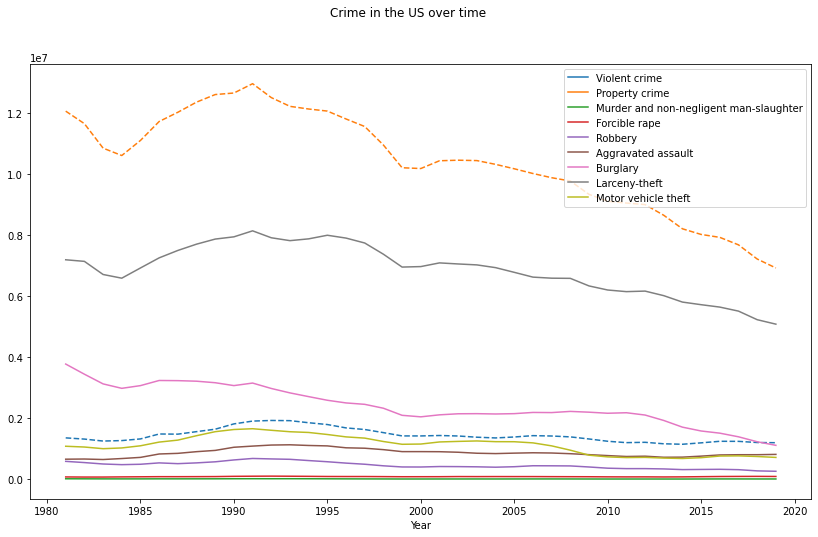

In [95]:
fig, ax = plt.subplots(figsize = (14,8))
fig.suptitle('Crime in the US over time')
for column in crime:
    if column not in ["Year", "population"]:
        sns.lineplot(x="Year", y=str(column), data=crime, ax=ax, label=str(column))

ax.set_ylabel('')
ax.legend()
selected = ["Violent crime", "Property crime"]
for line in ax.lines:
    if line.get_label() in selected:
        line.set_linestyle("--")
plt.show()

<div markdown=1 class="Note"> We notice that property crime is seemingly far more important than violent crime and that it could be a good idea to separate the two when doing our analysis.

From the previous graph we notice some general tendencies. Crime seems to generall decline with time.

Our next step is thus to take a closer look at the links between the entries of our crime dataset.

<div markdown=1 class="Obj"> We will now look at the correlation that exists inside of our data set. To do so we will use a heatmap of the Pearson coefficients associated between each column in the dataset.

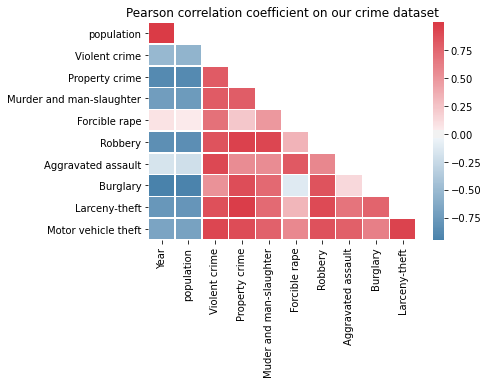

In [32]:
# Preparing mask and aesthetics
corr = crime.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr = corr.rename({"Murder and non-negligent man-slaughter": "Murder and man-slaughter"})
cmap = sns.diverging_palette(240, 10, as_cmap=True) # Color map

# Removing empty row and column
mask = mask[1:, :-1] 
corr = corr.iloc[1:,:-1].copy()

fig, ax =plt.subplots()
sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap, center=0)
plt.title("Pearson correlation coefficient on our crime dataset")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[4] = "Muder and man-slaughter"
ax.set_xticklabels(labels)
plt.show()

<div markdown=1 class="Res">

Our heatmap gives us some results that we could expect. For example, it is not surprising to find that the total population is correlated with time.

- From $1980$ to $2020$ there is a general inverse correlation between crime and time. This makes sense as our graph told us that crime was generally decreasing with time. 

- Crimes are generally positively correlated. We can convince ourselves that there is causation as the socio-economic facots influencing crime (poverty rates for example) would impact different types of crime in the same way. This logic would also explain that rape is generally less correlated with the others crimes.

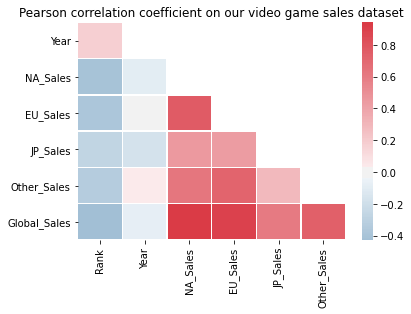

In [34]:
corr = vidya.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True) # Color map

# Removing empty row and column
mask = mask[1:, :-1] 
corr = corr.iloc[1:,:-1].copy()

fig, ax =plt.subplots()
sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap, center=0)
plt.title("Pearson correlation coefficient on our video game sales dataset")
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.show()

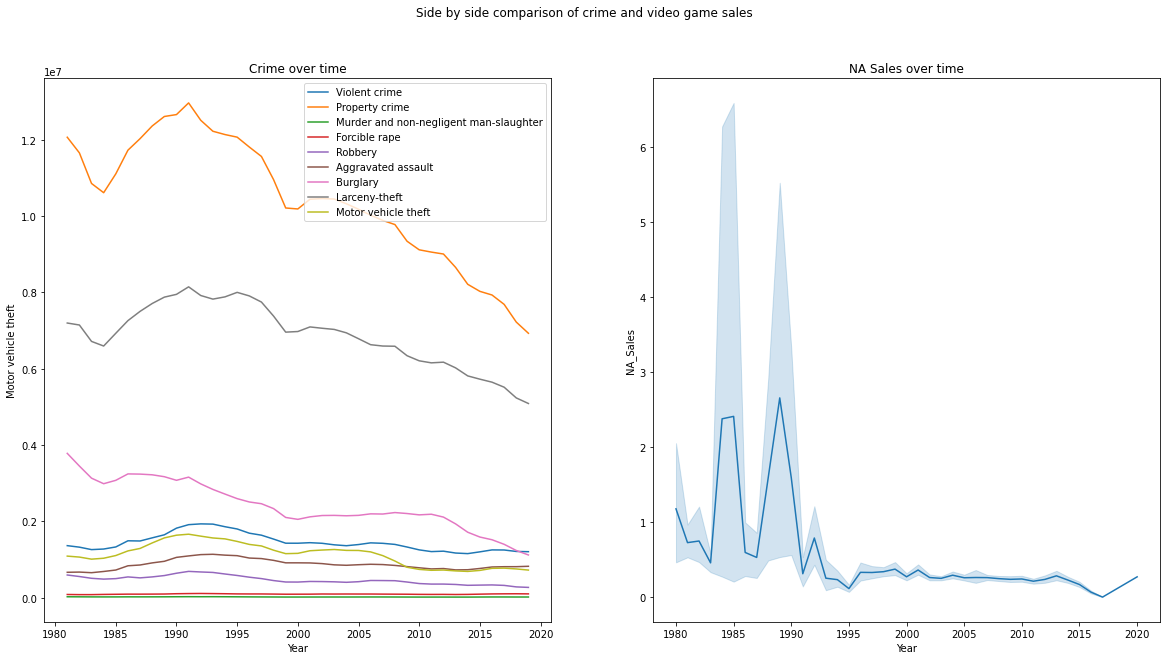

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10), sharex=False)
fig.suptitle('Side by side comparison of crime and video game sales')
for column in crime:
    if column not in ["Year", "population"]:
        sns.lineplot(x="Year", y=str(column), data=crime, ax=ax1, label=str(column))

ax1.set_title("Crime over time")
sns.lineplot(x="Year", y="NA_Sales",
             data=vidya, ax=ax2)
ax2.set_title("NA Sales over time")
ax1.legend()
plt.show()


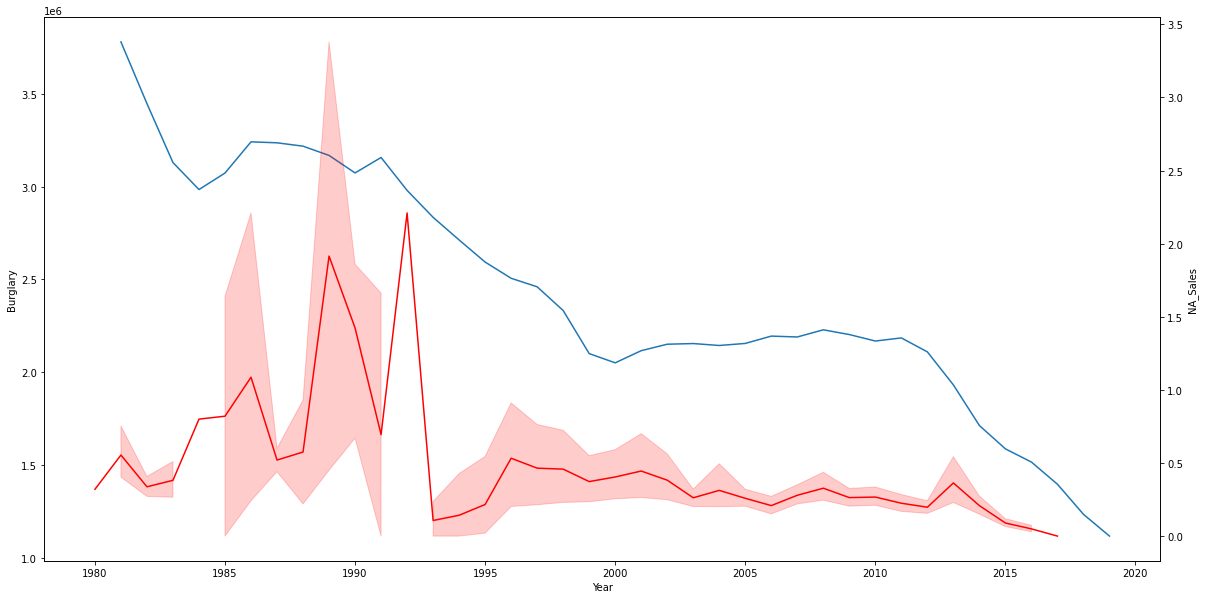

In [31]:
fig2, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="Year", y="Burglary",
             data=crime, ax = ax)
vidya_discrim = vidya.where(vidya["Genre"].isin(["Action"]))
axx = ax.twinx()
sns.lineplot(x="Year", y="NA_Sales", color="red",
             data=vidya_discrim, ax = axx)
plt.show()